**Case Study On Regression**

The given dataset contains the price of a second-hand Hyundai grand i10 car
with respect to year of making. Find the best linear relationship between year
and price. Can you predict the possible price of a 2022 model second-hand
grand i10?

Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df=pd.read_csv('/content/car_age_price.csv')
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


**PROBLEM STATEMENT:**
Find the best linear relationship between year
and price. Can you predict the possible price of a 2022 model second-hand
grand i10?

Target Column - Price Column

Regression Problem since target column is continuous numerical data.

# Data Analysis

In [85]:
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [86]:
df.shape

(112, 2)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [88]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [89]:
df.isna().sum()

,0
Year,0
Price,0


No Null Values found.

Text(0.5, 1.0, 'Price progression of Hyundai grand i10 car')

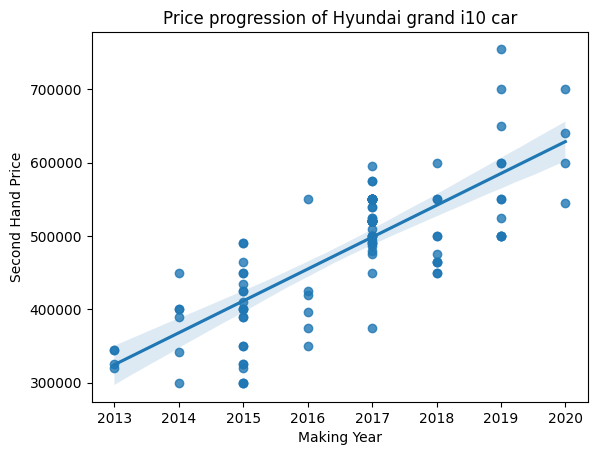

In [90]:
sns.regplot(x='Year',y='Price',data=df)
plt.xlabel('Making Year')
plt.ylabel('Second Hand Price')
plt.title('Price progression of Hyundai grand i10 car')

<Axes: xlabel='Price', ylabel='Count'>

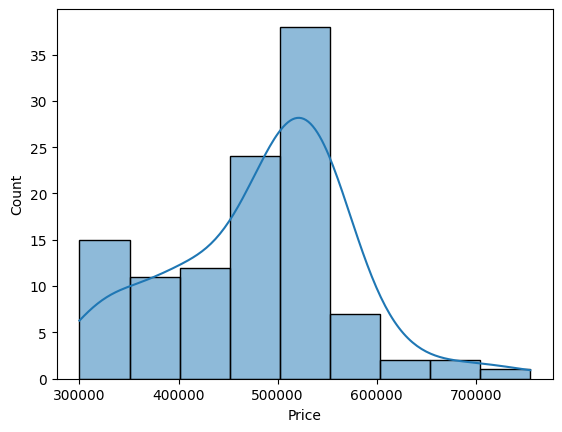

In [91]:
sns.histplot(df['Price'],kde=True)

The Price data is evenly distributed.It follows a bell shaped curved hence its normal distribution.

Outlier Detection

<Axes: xlabel='Price'>

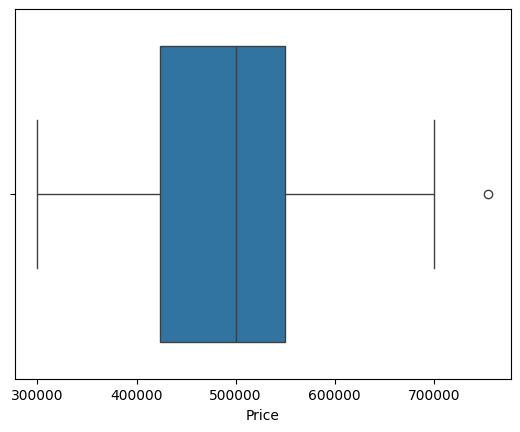

In [92]:
sns.boxplot(x=df['Price'])

# Preprocessing

Since year column is temporal data column we calculate year offset

In [93]:
df['Year_offset'] = df['Year'] - df['Year'].min()
df

,Year,Price,Year_offset
0,2018,465000,5
1,2019,755000,6
2,2019,700000,6
3,2018,465000,5
4,2018,465000,5
...,...,...,...
107,2016,375000,3
108,2014,300000,1
109,2015,425000,2
110,2016,420000,3


In [94]:
# split the features and target
X= df[['Year_offset']]
y=df['Price'] #target

# Model Training and Predicting

In [95]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

1. Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [121]:
model.fit(X_train,y_train)

LinearRegression()

In [98]:
# Checking the learned parameters:
model.coef_ # slope

array([46591.75732218])

In [99]:
model.intercept_ # line intercept

np.float64(319344.84239888424)

In [100]:
y_pred=model.predict(X_test)

# Evaluation

In [101]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)
r2=r2_score(y_test,y_pred)
print("R2 Score:",r2)

Mean Squared Error: 3962573261.894263
R2 Score: 0.4887760028600362


In [102]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 62948.97347768479


Meaning:
- MSE
  - Large MSE means predictions are far away from actual values
  - Small MSE means predictions are closer to actual value
  - df['Price'] ~ 48000 to 75000 but our MSE is 3962573261.8
  - Error is really high.Predictions are not at all close to actual value
  - If actual value=200,predicted value=120,square error=(80^2)=6400

- R2 score(more important metric):
  - r2 score of 0.48.This means that our model explains only 48% of variation in the target.
  - 52% of variation in price is not captured.
  - Year has influence on price but may not be the only factor
  - its a weak value that our model has given




2. Polynomial Regression

In [103]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2)
x_poly_train= poly_features.fit_transform(X_train)
x_poly_train

array([[ 1.,  4., 16.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  4., 16.],
       [ 1.,  2.,  4.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  2.,  4.],
       [ 1.,  7., 49.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  1.,  1.],
       [ 1.,  4., 16.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  6., 36.],
       [ 1.,  2.,  4.],
       [ 1.,  7., 49.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  2.,  4.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  2.,  4.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  0.,  0.],
       [ 1.,  2.,  4.],
       [ 1.,  6., 36.],
       [ 1.,  2.

In [104]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(x_poly_train,y_train)

print(lin_reg.intercept_)
print(lin_reg.coef_)

305861.8315439281
[    0.         55979.82877346 -1316.20242504]


In [105]:
x_test_poly=poly_features.transform(X_test)
y_pred_poly=lin_reg.predict(x_test_poly)

In [106]:
mse_poly=mean_squared_error(y_test,y_pred_poly)
print(mse_poly)

3921108727.108153


In [107]:
rmse_poly = np.sqrt(mse_poly)
print("Root Mean Squared Error:",rmse_poly)

Root Mean Squared Error: 62618.75699108178


In [108]:
r2_poly=r2_score(y_test,y_pred_poly)
print(r2_poly)

0.4941254724627182


3. SVM Regressor

In [109]:
from sklearn.svm import SVR

svr= SVR(kernel='rbf')
svr.fit(X_train,y_train)

SVR()

4. Decision Tree Regressor

In [110]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

5. Random Forest Regressor

In [111]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [112]:
y_pred_svr=svr.predict(X_test)
y_pred_dtr=dtr.predict(X_test)
y_pred_rfr=rfr.predict(X_test)

In [113]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

mse_svr=mean_squared_error(y_test,y_pred_svr)
mse_dtr=mean_squared_error(y_test,y_pred_dtr)
mse_rfr=mean_squared_error(y_test,y_pred_rfr)

mae_svr=mean_absolute_error(y_test,y_pred_svr)
mae_dtr=mean_absolute_error(y_test,y_pred_dtr)
mae_rfr=mean_absolute_error(y_test,y_pred_rfr)

r2_svr= r2_score(y_test,y_pred_svr)
r2_dtr= r2_score(y_test,y_pred_dtr)
r2_rfr= r2_score(y_test,y_pred_rfr)

rmse_svr = np.sqrt(mse_svr)
rmse_dtr = np.sqrt(mse_dtr)
rmse_rfr = np.sqrt(mse_rfr)

results_df=pd.DataFrame({
    'Model':['SVR','Decision Tree','Random Forest'],
    'MSE':[mse_svr,mse_dtr,mse_rfr],
    'RMSE':[rmse_svr,rmse_dtr,rmse_rfr],
    'MAE':[mae_svr,mae_dtr,mae_rfr],
    'R2 Score':[r2_svr,r2_dtr,r2_rfr]
})

results_df

,Model,MSE,RMSE,MAE,R2 Score
0,SVR,8.191414e+09,90506.431774,67786.972866,-0.056800
1,Decision Tree,3.084804e+09,55541.009044,43992.015478,0.602020
2,Random Forest,3.162873e+09,56239.425846,44413.812061,0.591948


# Conclusion and inferences

**Descision Tree Regressor gives the best R2 score of 0.6020 which means the model could account for almost 60.202% of price variation data properly and has the least RMSE error value when compared to other models like Linear Regression which had only 48%.**

**But Linear Regressor is more better than DecisionTree Regressor in predicting the price in 2022** as it:
- is trend based and considers time evolution
- can extrapolate linearly to unseen years whereas Decision Tree regressor cannot extrapolate beyond training years



Predicting the Price in Year 2022 using Decision Tree Regressor

In [124]:
y_pred_dtr1=dtr.predict([[2022-2013]])
print(" Price in 2022:",y_pred_dtr1)

 Price in 2022: [615000.]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


**Predicting the Price in Year 2022 using Linear Regressor: 738670.65**

In [115]:
y_pred1=model.predict([[2022-2013]])
print("Price in 2022:",y_pred1)

Price in 2022: [738670.65829847]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **LASSO REGRESSION**

Lasso Regression is a regression method based on Least Absolute Shrinkage and Selection Operator and is used in regression analysis for variable selection and regularization. It helps remove irrelevant data features and prevents overfitting. This allows features with weak influence to be clearly identified as the coefficients of less important variables are shrunk toward zero.

Lasso Regression is a regularization technique used to prevent overfitting. It improves linear regression by adding a penalty term to the standard regression equation. It works by minimizing the sum of squared differences between the observed and predicted values by fitting a line to the data.

However in real-world datasets features have strong correlations with each other known as multicollinearity where Lasso Regression actually helps.

Lasso Regression is an extension of linear regression. While traditional linear regression minimizes the sum of squared differences between the observed and predicted values to find the best-fit line, it doesn't handle the complexity of real-world data well when many factors are involved.

In Lasso regression a penalty term is added to the OLS equation. Penalty is the sum of the absolute values of the coefficients. Updated cost function becomes:

Σ(yᵢ- y^ᵢ)² + (λ x ∑|βi|)

Where,
- βi represents the coefficients of the predictors
- λ is the tuning parameter that controls the strength of the penalty. As λ increases more coefficients are pushed towards zero λ >0 more regularization

In [116]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=10000)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [117]:
mse_lasso=mean_squared_error(y_test,y_pred_lasso)
print("Mean Squared Error:",mse_lasso)
r2_lasso=r2_score(y_test,y_pred_lasso)
print("R2 Score:",r2_lasso)

Mean Squared Error: 3776073079.418585
R2 Score: 0.5128369759830846


In [118]:
rmse_lasso = np.sqrt(mse_lasso)
print("Root Mean Squared Error:",rmse_lasso)

Root Mean Squared Error: 61449.76061319185


Predicting the Price in Year 2022 using Lasso Regression:

In [119]:
y_pred_lasso1=model.predict([[2022-2013]])
print("Price in 2022:",y_pred_lasso1)

Price in 2022: [738670.65829847]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [120]:
results_df1=pd.DataFrame({
    'Model':['Linear Regressor','Lasso Regression'],
    'MSE':[mse,mse_lasso],
    'RMSE':[rmse,rmse_lasso],
    'R2 Score':[r2,r2_lasso]
})

results_df1

,Model,MSE,RMSE,R2 Score
0,Linear Regressor,3.962573e+09,62948.973478,0.488776
1,Lasso Regression,3.776073e+09,61449.760613,0.512837


**Lasso Regression is better when compared to Linear Regression as the error is reduced and R2 score of 51.28% which is slightly better than Linear indicating its could explain the data better. But the price in 2022 is the same predicted by Linear and Lasso Regressor.**

The R2 score maximum is still around 0.5 to 0.6 from all models which implies almost 50 to 60 % of the variation in price different model could account for and explain or predict correctly. This implies Price of a second hand car just does not depend on the making year and there are even other features like location,condition etc which also determines price. Hence year feature has the highest influence on price but the price trend cannot be completely explained only with that.